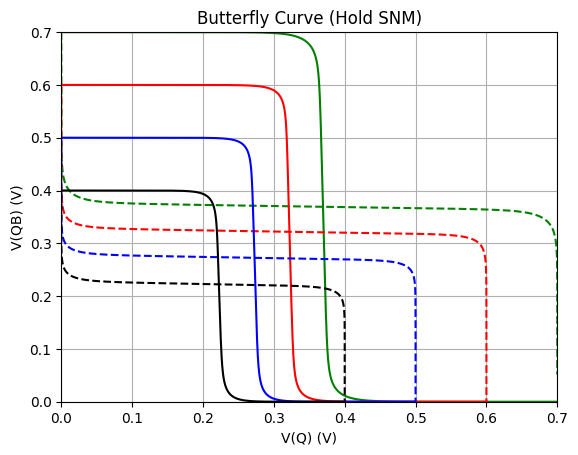

In [15]:
# VDDVAL = 0.7V

from matplotlib import pyplot as plt
import numpy as np
import math

# Load data (assuming columns: VQ, V(q), V(qb))
data = np.loadtxt('converted_output_DifSupply.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)

# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='green', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='green', linestyle='-')  # 

data = np.loadtxt('converted_output_DifSupply_0.6.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)
# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='red', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='red', linestyle='-')  # 

data = np.loadtxt('converted_output_DifSupply_0.5.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)
# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='blue', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='blue', linestyle='-')  # 

data = np.loadtxt('converted_output_DifSupply_0.4.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)
# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='black', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='black', linestyle='-')  # 

plt.xlabel('V(Q) (V)')
plt.ylabel('V(QB) (V)')
plt.title('Butterfly Curve (Hold SNM)')
#plt.legend()
plt.grid()
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.show()

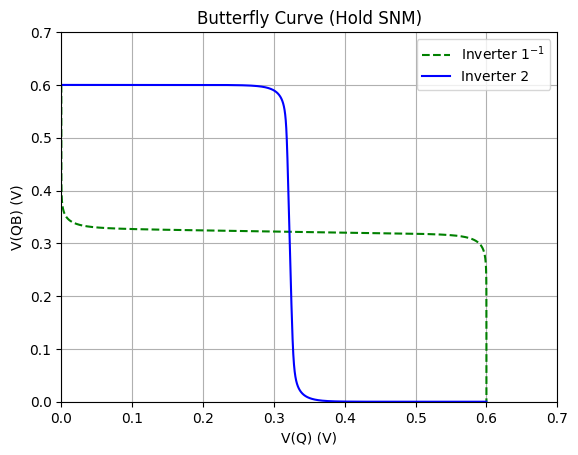

In [5]:
# VDDVAL = 0.6V

from matplotlib import pyplot as plt
import numpy as np
import math

# Load data (assuming columns: VQ, V(q), V(qb))
data = np.loadtxt('converted_output_DifSupply_0.6.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)

# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='green', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='blue', linestyle='-')  # 
plt.xlabel('V(Q) (V)')
plt.ylabel('V(QB) (V)')
plt.title('Butterfly Curve (Hold SNM)')
plt.legend()
plt.grid()
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.show()

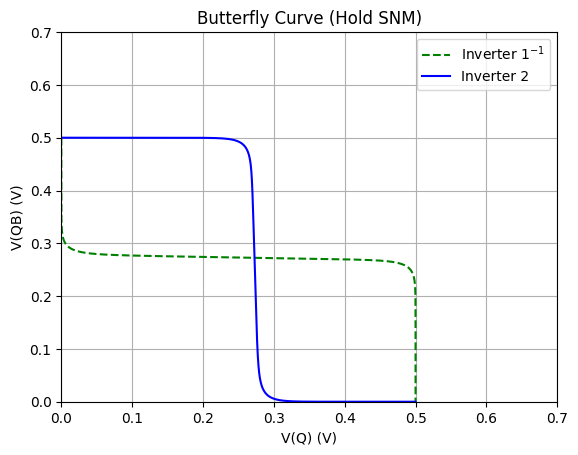

In [8]:
# VDDVAL = 0.5V

from matplotlib import pyplot as plt
import numpy as np
import math

# Load data (assuming columns: VQ, V(q), V(qb))
data = np.loadtxt('converted_output_DifSupply_0.5.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)

# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='green', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='blue', linestyle='-')  # 
plt.xlabel('V(Q) (V)')
plt.ylabel('V(QB) (V)')
plt.title('Butterfly Curve (Hold SNM)')
plt.legend()
plt.grid()
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.show()

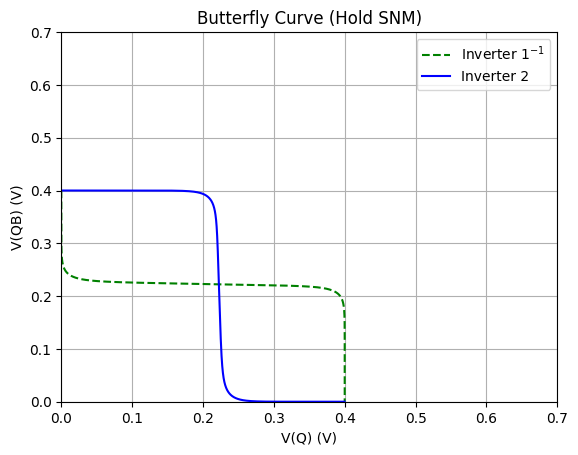

In [9]:
# VDDVAL = 0.4V

from matplotlib import pyplot as plt
import numpy as np
import math

# Load data (assuming columns: VQ, V(q), V(qb))
data = np.loadtxt('converted_output_DifSupply_0.4.txt')
v_q = data[:, 1]   # V(q)
v_qb = data[:, 2]  # V(qb)
v_gl = data[:, 3]   # V(q)
v_gr = data[:, 4]  # V(qb)

# Plot VTC and inverse VTC
plt.plot(v_q, v_gr, label='Inverter 1$^{-1}$', color='green', linestyle='--')  #
plt.plot(v_gl, v_qb, label='Inverter 2', color='blue', linestyle='-')  # 
plt.xlabel('V(Q) (V)')
plt.ylabel('V(QB) (V)')
plt.title('Butterfly Curve (Hold SNM)')
plt.legend()
plt.grid()
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.show()

In [ ]:
def convert_si_value(val):
    """Chuyển đổi giá trị có hậu tố SI thành số thô."""
    try:
        # Loại bỏ khoảng trắng và kiểm tra giá trị
        val = val.strip()
        if not val:  # Nếu giá trị rỗng
            return None
        
        # Định nghĩa các hậu tố SI và hệ số tương ứng
        si_prefixes = {
            'p': 1e-12,  # pico
            'n': 1e-9,   # nano
            'u': 1e-6,   # micro
            'm': 1e-3,   # milli
            '':  1,      # không hậu tố
            'k': 1e3,    # kilo
            'M': 1e6,    # mega
            'G': 1e9     # giga
        }
        
        # Tách số và hậu tố
        for prefix, factor in si_prefixes.items():
            if val.endswith(prefix):
                num_str = val[:-len(prefix)] if prefix else val
                return float(num_str) * factor
        return float(val)  # Nếu không có hậu tố, chuyển trực tiếp
    except ValueError:
        return val  # Trả về nguyên bản nếu không chuyển đổi được

def process_lis_file(input_file, output_file=None, start_line=50, end_line=7074):
    """Đọc file .lis, xử lý từ dòng start_line đến end_line, và chuyển đổi hậu tố SI."""
    with open(input_file, 'r') as f:
        lines = f.readlines()
    
    # Giới hạn phạm vi từ start_line đến end_line (chuyển về index 0-based)
    start_idx = start_line - 1
    end_idx = min(end_line, len(lines))  # Đảm bảo không vượt quá độ dài file
    data_lines = lines[start_idx:end_idx]
    
    # Xử lý từng dòng
    processed_lines = []
    for line in data_lines:
        # Tách các cột bằng khoảng trắng
        columns = line.split()
        if columns:  # Chỉ xử lý dòng không rỗng
            # Chuyển đổi từng giá trị trong dòng
            converted_columns = [str(convert_si_value(col)) if convert_si_value(col) is not None else col for col in columns]
            processed_lines.append(' '.join(converted_columns))
    
    # In ra màn hình
    for line in processed_lines:
        print(line)
    
    # Nếu có output_file, ghi vào file
    if output_file:
        with open(output_file, 'w') as f:
            f.write('\n'.join(processed_lines))

# Sử dụng script
input_file = 'SRAM_SNM_TT_DifSupply.lis'  # Thay bằng tên file .lis của bạn
output_file = 'converted_output_DifSupply.txt'  # File đầu ra (tùy chọn)
process_lis_file(input_file, output_file, start_line=44, end_line=9943) # Thay đổi start_line và end_line nếu cần 
# (44-9943, 10092-18577, 18708-25780,25912-31568)
output_file = 'converted_output_DifSupply_0.6.txt'  # File đầu ra (tùy chọn)
process_lis_file(input_file, output_file, start_line=10092, end_line=18577)

output_file = 'converted_output_DifSupply_0.5.txt'  # File đầu ra (tùy chọn)
process_lis_file(input_file, output_file, start_line=18709, end_line=25780)

output_file = 'converted_output_DifSupply_0.4.txt'  # File đầu ra (tùy chọn)
process_lis_file(input_file, output_file, start_line=25912, end_line=31568)